# Importing the necessary library 

In [1]:
import os
import random

#hindi font
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import numpy as np
import pandas as pd

#image display
import cv2

#tqdm used for progress bar
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score

# The names of each character, in the correct order for the Hindi Devnagri script

In [2]:
class_names='''character_1_ka character_2_kha character_3_ga character_4_gha character_5_kna character_6_cha character_7_chha 
character_8_ja character_9_jha character_10_yna character_11_taamatar character_12_thaa character_13_daa character_14_dhaa 
character_15_adna character_16_tabala character_17_tha character_18_da character_19_dha character_20_na character_21_pa 
character_22_pha character_23_ba character_24_bha character_25_ma character_26_yaw character_27_ra character_28_la 
character_29_waw character_30_motosaw character_31_petchiryakha character_32_patalosaw character_33_ha character_34_chhya 
character_35_tra character_36_gya digit_0 digit_1 digit_2 digit_3 digit_4 digit_5 digit_6 digit_7 digit_8 digit_9'''.split()

hindi_character = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह ॠ त्र ज्ञ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split() 

In [3]:
print(hindi_character)

['क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', 'ॠ', 'त्र', 'ज्ञ', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']


In [4]:
hindi_font = FontProperties(fname='./hindi-font/Nirmala.ttf') # Hindi font to display in Matplotlib

# Define the paths

In [5]:
dataset_path =r"C:\Users\DELL\jupyterr/DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test"


train_dataset_path = dataset_path+"/Train"
test_dataset_path = dataset_path+"/Test"

print(f"Train Path : {train_dataset_path}")
print(f"Test Path : {test_dataset_path}")

Train Path : C:\Users\DELL\jupyterr/DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Train
Test Path : C:\Users\DELL\jupyterr/DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Test


# Visualize the data

In [6]:
def see_random_picture(target_dir , class_name):
    target_directory = target_dir + '/' + class_name                    # Example --> Train + '/' + character_1_ka  -->  Train/character_1_ka
    random_picture_name = random.choice(os.listdir(target_directory))   # Selecting random image from Train/character_1_ka
    image_path = target_directory + '/' + random_picture_name           # let say random image name is 10963.png , so final image path would be :                                                                      #                                                     Train/character_1_ka/10963.png
    image = plt.imread(image_path) 

    hindi_char_name = hindi_character[class_names.index(class_name)]
    hindi_font = FontProperties(fname='./hindi-font/Nirmala.ttf')

    plt.figure(figsize=(2,2))
    print(f"Shape of image : {image.shape}")  #  display the shape of the image.
    plt.imshow(image , cmap='gray')
    plt.title(f"{class_name} - ({hindi_char_name})",fontproperties=hindi_font)
    plt.axis("off")

# Let view any random character from train data


Shape of image : (32, 32)


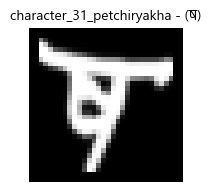

In [7]:
see_random_picture(train_dataset_path,
                   random.choice(class_names))

# Load Data

In [8]:
def load_data_from_directory(directory, class_names, description=None):
    all_images = []
    all_labels = []

    for class_name in tqdm(class_names,desc=description):
        target_dir = directory + "/" + class_name
        images = os.listdir(target_dir)

        for img in images:
            img_path = target_dir + "/" + img
            img_arr = cv2.imread(img_path,0).flatten()
            img_label = class_names.index(class_name)

            all_images.append(img_arr.astype('float32'))
            all_labels.append(img_label)

    return np.array(all_images), np.array(all_labels)

In [9]:
X_train, y_train = load_data_from_directory(train_dataset_path,class_names,"Loading train data...  ")
X_test, y_test = load_data_from_directory(test_dataset_path,class_names,"Loading test data...  ")

Loading train data...  :   0%|          | 0/46 [00:00<?, ?it/s]

Loading test data...  :   0%|          | 0/46 [00:00<?, ?it/s]

In [10]:
X_train.shape, X_test.shape 

((7820, 1024), (13800, 1024))

In [11]:
y_train.shape, y_test.shape

((7820,), (13800,))

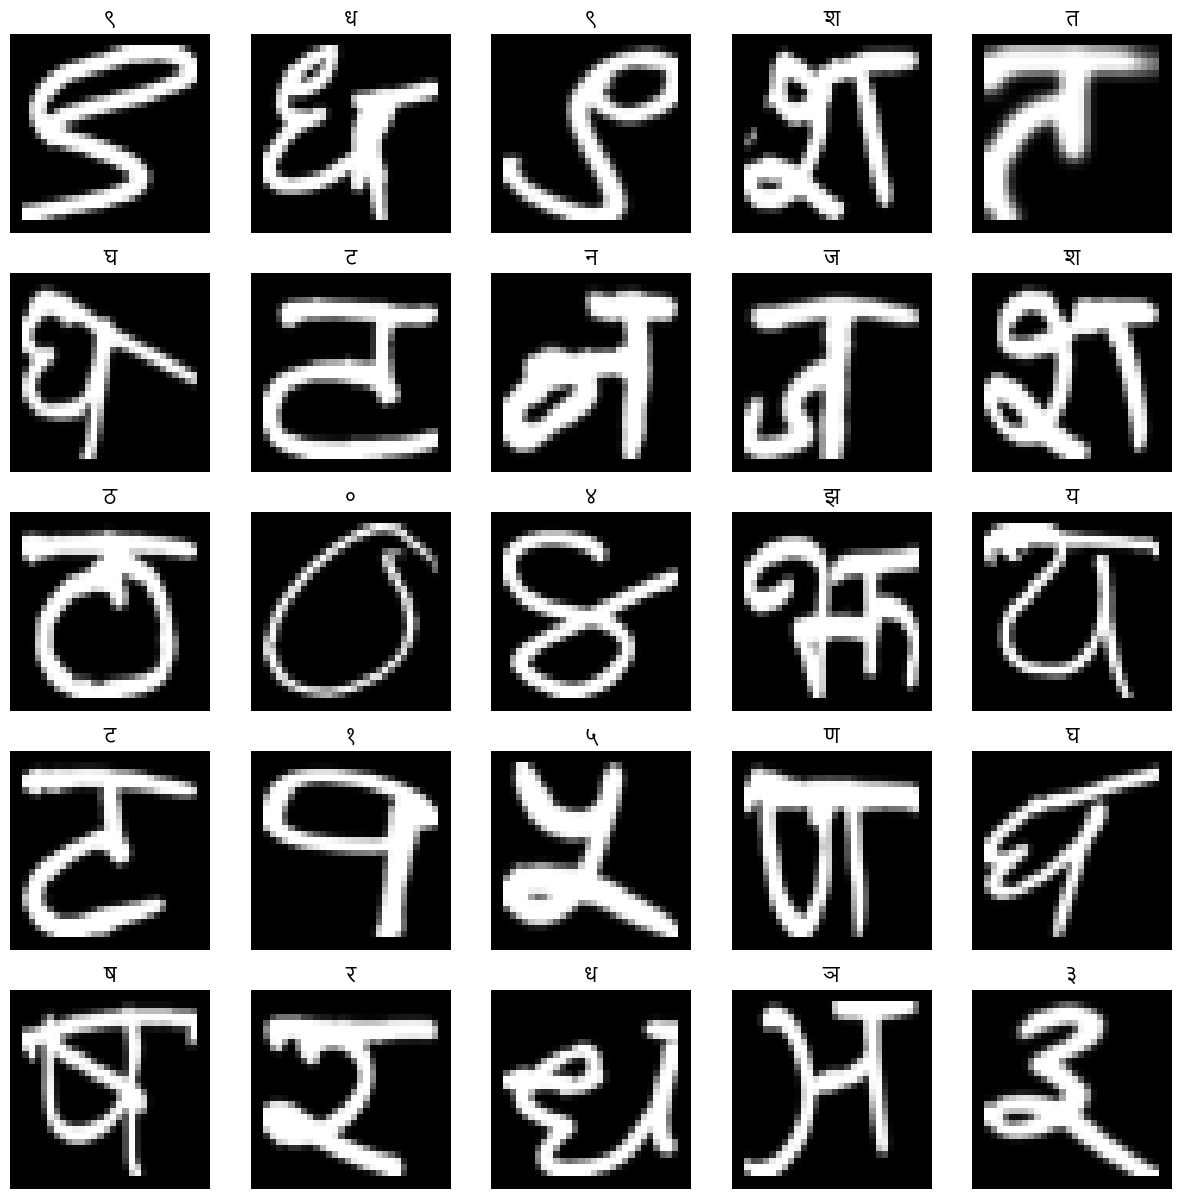

In [12]:
fig, ax = plt.subplots(5,5, figsize=(15,15))
ax = ax.flatten()

for i in range(25):
    k = np.random.randint(0,len(X_train))
    
    img = X_train[k]
    label = y_train[k]
    
    ax[i].imshow(img.reshape(32,32),cmap='gray')
    ax[i].axis(False)
    ax[i].set_title(hindi_character[label],fontproperties=hindi_font, fontsize=15)

plt.show()

# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=0.98)  # Retain 98% of information
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [17]:
X_train_pca.shape, X_test_pca.shape

((7820, 293), (13800, 293))

In [18]:
pca.n_components_

293

# Model - 1 : Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model

In [20]:
# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, n_jobs=-1)
logistic_model.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [21]:
# Predict on the test set
y_pred = logistic_model.predict(X_test_pca)

In [22]:
accuracy_score(y_test,y_pred)

0.6057971014492753

# Hyper parameter tunning for Logistic regression

In [23]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import optuna

In [25]:
def objective(trial):
    # Define hyperparameters to search
    C = trial.suggest_float('C', 1e-5, 1e5, log=True)

    # Train Logistic Regression model with suggested hyperparameters
    logistic_model = LogisticRegression(C=C,max_iter=1000, n_jobs=-1)
    logistic_model.fit(X_train_pca, y_train)

    y_pred = logistic_model.predict(X_test_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    return 1 - accuracy 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = LogisticRegression(C=best_params['C'], max_iter=1000, n_jobs=-1)
best_model.fit(X_train_pca, y_train)

# Evaluate the best model
y_pred_final = best_model.predict(X_test_pca)
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy: {final_accuracy:.2f}")

[I 2024-02-24 09:16:32,257] A new study created in memory with name: no-name-a8c3dff6-3214-4890-bd40-23c51066c719
[I 2024-02-24 09:16:47,636] Trial 0 finished with value: 0.40855072463768116 and parameters: {'C': 4.254616541606871}. Best is trial 0 with value: 0.40855072463768116.
[I 2024-02-24 09:16:59,519] Trial 1 finished with value: 0.4134782608695652 and parameters: {'C': 6.80070294704541}. Best is trial 0 with value: 0.40855072463768116.
[I 2024-02-24 09:17:14,002] Trial 2 finished with value: 0.3773188405797101 and parameters: {'C': 0.40724212945354776}. Best is trial 2 with value: 0.3773188405797101.
[I 2024-02-24 09:17:23,935] Trial 3 finished with value: 0.3265217391304348 and parameters: {'C': 0.045879079284682045}. Best is trial 3 with value: 0.3265217391304348.
[I 2024-02-24 09:17:28,685] Trial 4 finished with value: 0.32934782608695656 and parameters: {'C': 0.0016216839239184305}. Best is trial 3 with value: 0.3265217391304348.
[I 2024-02-24 09:17:34,028] Trial 5 finished

Best Hyperparameters: {'C': 0.007415201641315888}
Final Model Accuracy: 0.69


# Save the Model

In [26]:
import joblib

In [27]:
def save_model(model, filename):
    try:
        joblib.dump(model, f"./MyModels/{filename}" )
        print(f"Model saved successfully to ./MyModels/{filename}")
    except Exception as e:
        print(f"Error saving the model: {e}")

In [28]:
save_model(best_model, 'best_logistic_regression_model.joblib')

Model saved successfully to ./MyModels/best_logistic_regression_model.joblib


# Load the model

In [29]:
def load_model(filename):
    try:
        model = joblib.load(filename)
        print(f"Model loaded successfully from {filename}")
        return model
    except Exception as e:
        print(f"Error loading the model: {e}")
        return None

In [30]:
log_reg = load_model('./MyModels/best_logistic_regression_model.joblib')

Model loaded successfully from ./MyModels/best_logistic_regression_model.joblib


In [31]:
y_pred = log_reg.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 69.24%


# Test the Logistic regression model

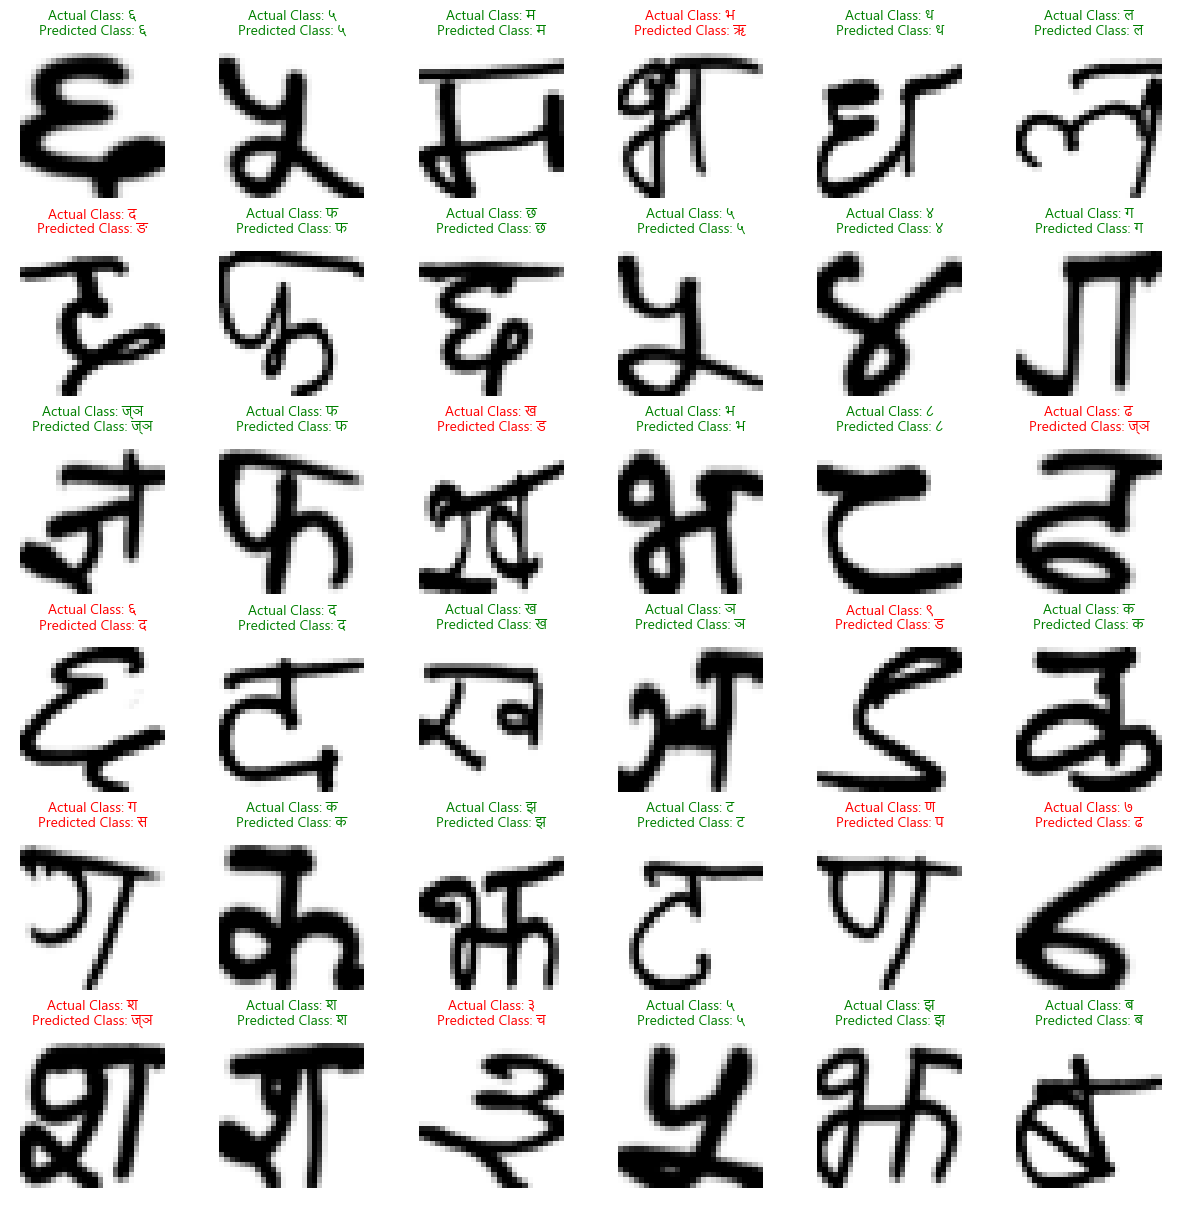

In [32]:
fig, ax = plt.subplots(6,6, figsize=(15,15))
ax = ax.flatten()

for i in range(36):
    k = np.random.randint(0, len(X_test))
    img = X_test[k]
    img_pca = X_test_pca[k]

    pred_class = log_reg.predict([img_pca])[0]
    true_class = y_test[k]

    if pred_class == true_class:
        color='green'
    else:
        color='red'

    ax[i].imshow(img.reshape(32,32),cmap='gray_r')
    ax[i].axis(False)
    ax[i].set_title(f"Actual Class: {hindi_character[true_class]}\nPredicted Class: {hindi_character[pred_class]}",
                    color=color,
                    fontproperties=hindi_font)

plt.show()

In [33]:
def single_image_prediction(img,model):
    img_arr = cv2.imread(img,0).flatten().astype("float32")
    img_scaler = scaler.transform(img_arr.reshape(1,-1))
    img_pca = pca.transform(img_scaler)

    y_pred = model.predict(img_pca)[0]
    pred_class = hindi_character[y_pred]

    plt.imshow(img_arr.reshape(32,32),cmap='gray')
    plt.title(f"Predicted Class : {pred_class} ",fontproperties=hindi_font,fontsize=20)
    plt.axis(False)
    plt.show()

In [34]:
test_img1 = "./DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Test/character_1_ka/10963.png"
test_img_2 = "./DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Test/character_21_pa/11115.png"

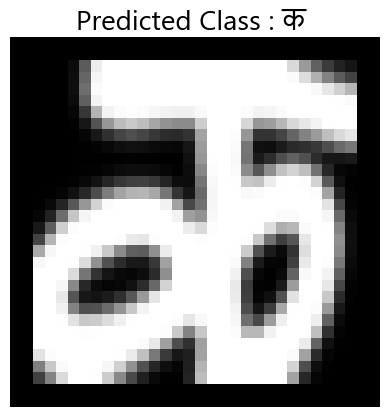

In [35]:
single_image_prediction(test_img1,log_reg)

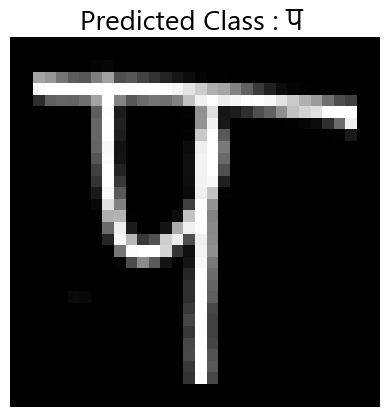

In [36]:
single_image_prediction(test_img_2,log_reg)

# Model-2: KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [39]:
# Fit the classifier on the reduced dimensionality data
knn_classifier.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [40]:
# Predictions on the test set
y_pred = knn_classifier.predict(X_test_pca)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File

In [41]:
accuracy_score(y_test,y_pred)

0.7533333333333333

# Hyer parameter tuning for KNN

In [42]:
import optuna
from sklearn.model_selection import cross_val_score

In [43]:
def objective(trial):
    # Define search space for hyperparameters
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    
    # Initialize KNN classifier with hyperparameters
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, n_jobs=-1)

    # Use cross-validation for training and evaluation
    cv_score = cross_val_score(knn_classifier, X_train_pca, y_train, cv=5, scoring='accuracy').mean()

    return cv_score

In [44]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-02-24 09:22:49,135] A new study created in memory with name: no-name-d63a7215-9496-4c33-babe-ce543293f2c3
[I 2024-02-24 09:22:49,983] Trial 0 finished with value: 0.5285166240409207 and parameters: {'n_neighbors': 10, 'weights': 'uniform'}. Best is trial 0 with value: 0.5285166240409207.
[I 2024-02-24 09:22:50,930] Trial 1 finished with value: 0.5328644501278773 and parameters: {'n_neighbors': 14, 'weights': 'distance'}. Best is trial 1 with value: 0.5328644501278773.
[I 2024-02-24 09:22:51,786] Trial 2 finished with value: 0.5286445012787724 and parameters: {'n_neighbors': 9, 'weights': 'uniform'}. Best is trial 1 with value: 0.5328644501278773.
[I 2024-02-24 09:22:52,704] Trial 3 finished with value: 0.5140664961636828 and parameters: {'n_neighbors': 20, 'weights': 'uniform'}. Best is trial 1 with value: 0.5328644501278773.
[I 2024-02-24 09:22:53,544] Trial 4 finished with value: 0.5570332480818414 and parameters: {'n_neighbors': 1, 'weights': 'distance'}. Best is trial 4 wit

In [45]:
# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 4, 'weights': 'distance'}


In [46]:
# Train KNN classifier with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'] , weights=best_params['weights'],n_jobs=-1)
best_knn_classifier.fit(X_train_pca, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [47]:
# Evaluate the performance on the test set
y_pred = best_knn_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2%}")

Final Model Accuracy: 78.05%


# Save the best Model

In [48]:
save_model(best_knn_classifier, 'best_knn_classifier_model.joblib')

Model saved successfully to ./MyModels/best_knn_classifier_model.joblib


# Test the KNN Model

In [49]:
def pred_and_plot(model):

    fig, ax = plt.subplots(6,6, figsize=(15,15))
    ax = ax.flatten()
    
    for i in range(36):
        k = np.random.randint(0, len(X_test))
        img = X_test[k]
        img_pca = X_test_pca[k]
    
        pred_class = model.predict([img_pca])[0]
        true_class = y_test[k]
    
        if pred_class == true_class:
            color='green'
        else:
            color='red'
    
        ax[i].imshow(img.reshape(32,32),cmap='gray_r')
        ax[i].axis(False)
        ax[i].set_title(f"Actual Class: {hindi_character[true_class]}\nPredicted Class: {hindi_character[pred_class]}",
                        color=color,
                        fontproperties=hindi_font)
    
    plt.show()

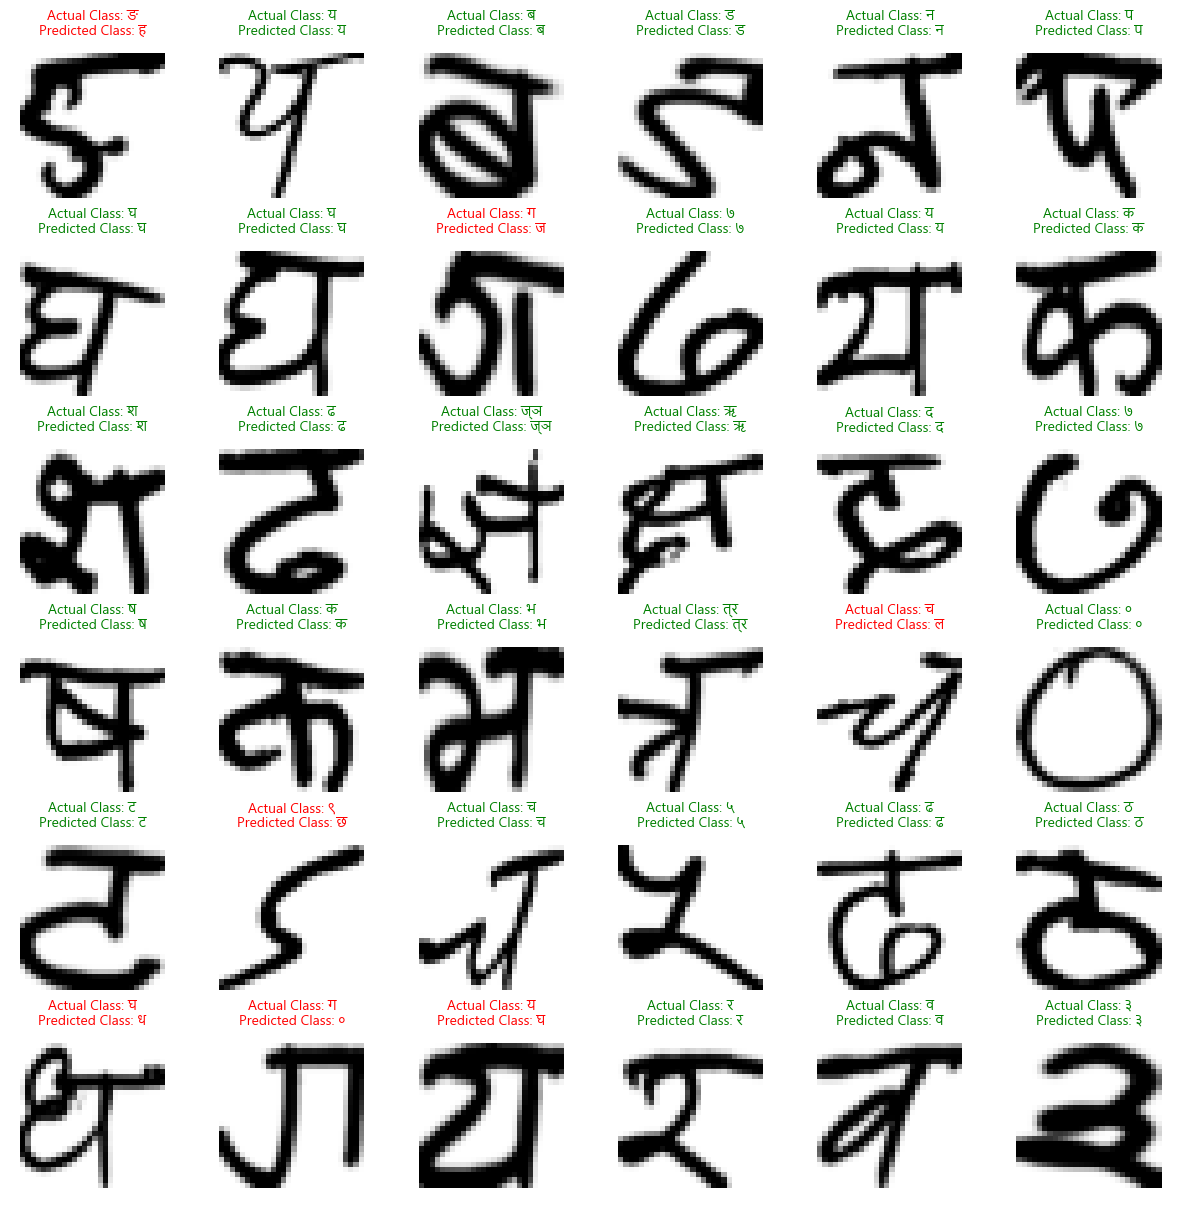

In [50]:
pred_and_plot(best_knn_classifier)

In [51]:
test_img1 = "./DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Test/character_28_la/11430.png"
test_img_2 = "./DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Test/character_21_pa/11115.png"

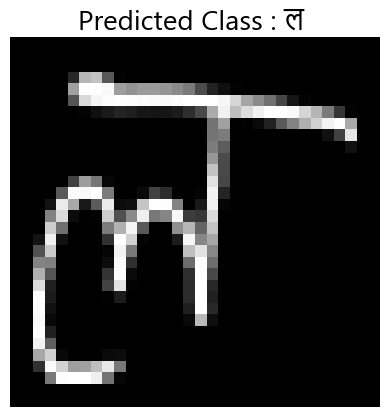

In [52]:
single_image_prediction(test_img1,best_knn_classifier)

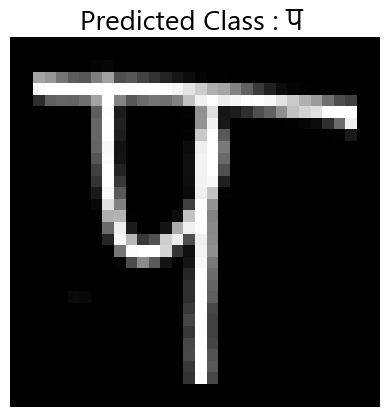

In [53]:
single_image_prediction(test_img_2,best_knn_classifier)

# Model-3 : Support Vector Classifier

In [54]:
from sklearn.svm import SVC

In [55]:
# Initialize SVC with default parameters
svc_classifier = SVC()

In [56]:
# Fit the classifier on the reduced dimensionality data
svc_classifier.fit(X_train_pca, y_train)

SVC()

In [57]:
# Predictions on the test set
y_pred = svc_classifier.predict(X_test_pca)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8338405797101449

# Hyper parameter tunning for SVC 

In [59]:
import optuna
from sklearn.model_selection import cross_val_score

In [60]:
def objective(trial):
    # Define search space for hyperparameters
    C = trial.suggest_float('C', 1e-5, 1e5,log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])   # , 'sigmoid'
    degree = trial.suggest_int('degree', 2, 5) # if kernel == 'poly' else None
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto']) # if kernel in ['rbf', 'poly', 'sigmoid'] else 'scale'

    # C = trial.suggest_float('C', 1e-3, 1e3, log=True)
    # kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    # gamma = trial.suggest_float('gamma', 1e-3, 1e3, log=True)

    # Initialize SVC classifier with hyperparameters
    svc_classifier = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)

    # Use cross-validation for training and evaluation
    cv_score = cross_val_score(svc_classifier, X_train_pca, y_train, cv=5, scoring='accuracy').mean()

    return cv_score

In [61]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

[I 2024-02-24 09:25:22,681] A new study created in memory with name: no-name-b4990204-2b9d-4f18-8a30-7d05ba9f6041
[I 2024-02-24 09:26:24,500] Trial 0 finished with value: 0.6063938618925832 and parameters: {'C': 13.090404377157503, 'kernel': 'linear', 'degree': 2, 'gamma': 'auto'}. Best is trial 0 with value: 0.6063938618925832.
[I 2024-02-24 09:26:24,858] Trial 1 finished with value: 0.6063938618925832 and parameters: {'C': 0.06415828994603472, 'kernel': 'linear', 'degree': 4, 'gamma': 'scale'}. Best is trial 0 with value: 0.6063938618925832.
[I 2024-02-24 09:26:25,853] Trial 6 finished with value: 0.6063938618925832 and parameters: {'C': 1141.2415856619962, 'kernel': 'linear', 'degree': 3, 'gamma': 'auto'}. Best is trial 0 with value: 0.6063938618925832.
[I 2024-02-24 09:26:25,962] Trial 3 finished with value: 0.6063938618925832 and parameters: {'C': 26.38238563895655, 'kernel': 'linear', 'degree': 4, 'gamma': 'scale'}. Best is trial 0 with value: 0.6063938618925832.
[I 2024-02-24 09

In [62]:
# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 15029.624078636587, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto'}


In [63]:
best_svc_classifier = SVC(C=best_params['C'],kernel=best_params['kernel'],degree=best_params['degree'],gamma=best_params['gamma'])
best_svc_classifier.fit(X_train_pca,y_train)

SVC(C=15029.624078636587, degree=2, gamma='auto', kernel='poly')

In [64]:
# Evaluate the performance on the test set
y_pred = best_svc_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2%}")

Final Model Accuracy: 85.51%


# Save the best SVC model

In [65]:
import joblib

In [66]:
save_model(best_svc_classifier, 'best_svc_classifier_model.joblib')

Model saved successfully to ./MyModels/best_svc_classifier_model.joblib


# Test the SVC model

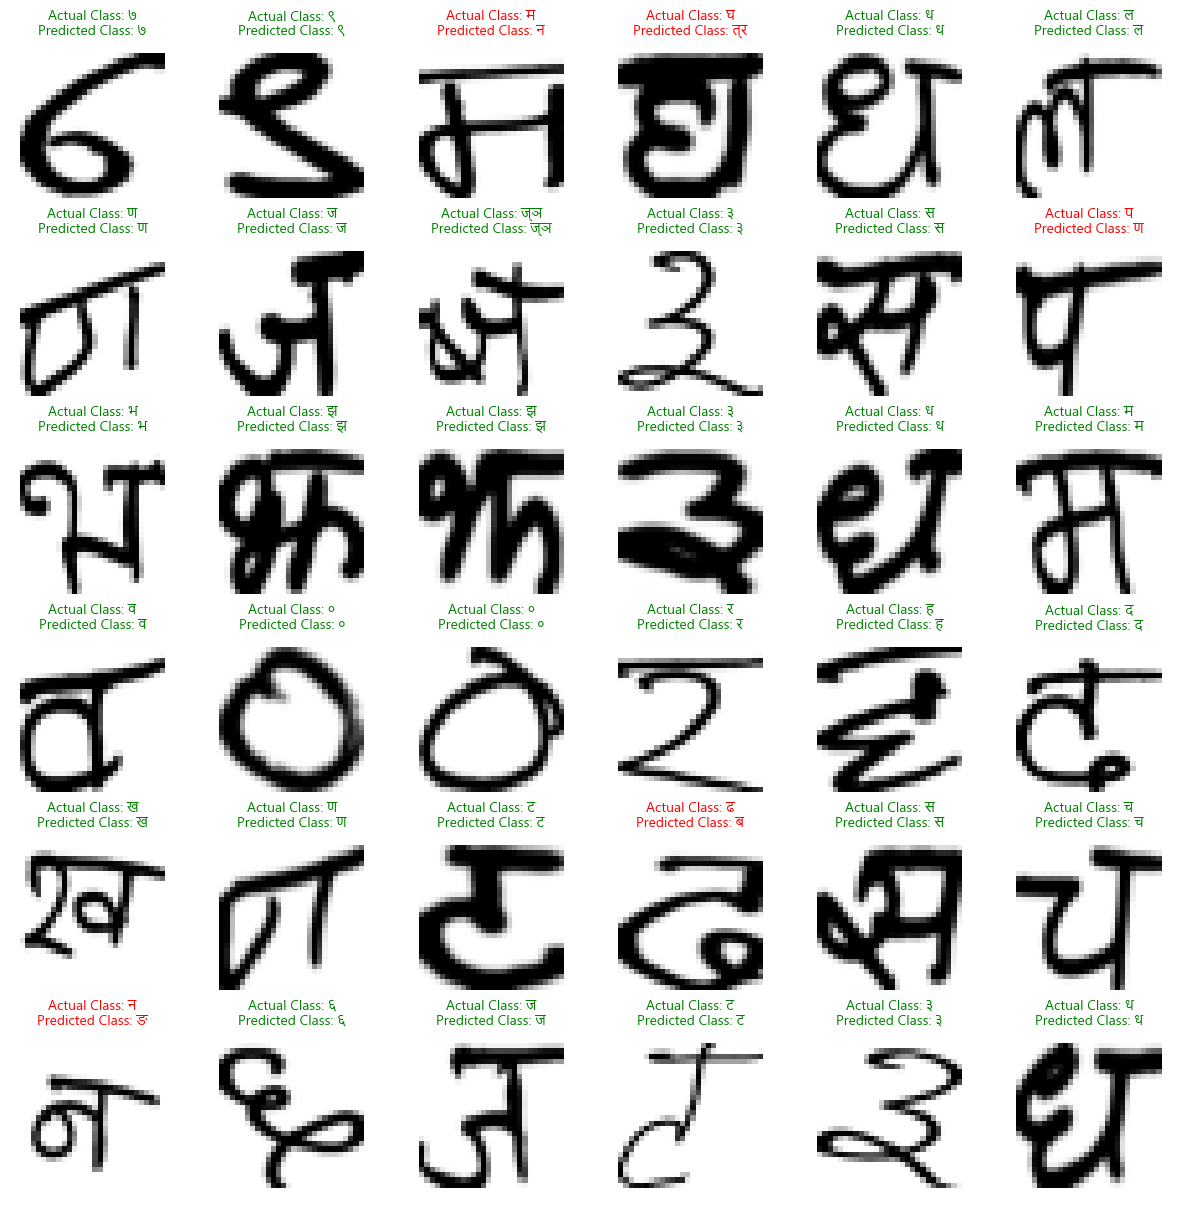

In [67]:
pred_and_plot(best_svc_classifier)

In [68]:
test_img_1 = "./DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Test/character_28_la/11430.png"
test_img_2 = "./DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Test/character_21_pa/11115.png"

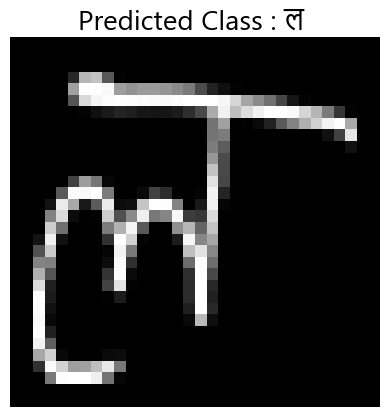

In [69]:
single_image_prediction(test_img_1,best_svc_classifier)

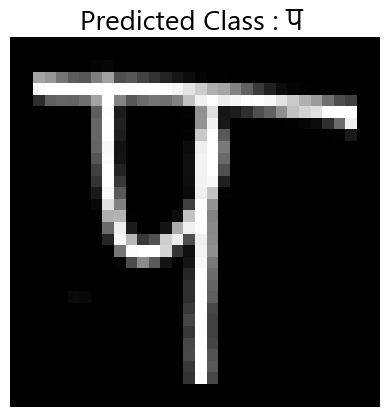

In [70]:
single_image_prediction(test_img_2,best_svc_classifier)

# Model-4 : Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
# Initialize RandomForestClassifier with default parameters
rf_classifier = RandomForestClassifier()

In [73]:
# Fit the classifier on the reduced dimensionality data
rf_classifier.fit(X_train_pca, y_train)

RandomForestClassifier()

In [74]:
# Predictions on the test set
y_pred = rf_classifier.predict(X_test_pca)

In [75]:
# Calculate accuracy
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.6324637681159421

# Hyper parameter tunning for Random Forest

In [76]:
import optuna
from sklearn.model_selection import cross_val_score
import optuna
from sklearn.tree import DecisionTreeClassifier

In [77]:
def objective(trial):
    # Define search space for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Initialize RandomForestClassifier with hyperparameters
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42  # Ensure reproducibility
    )

    # Use cross-validation for training and evaluation
    cv_score = cross_val_score(rf_classifier, X_train_pca, y_train, cv=5, scoring='accuracy').mean()

    return cv_score

In [78]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

[I 2024-02-24 10:02:50,137] A new study created in memory with name: no-name-28b0a46c-d727-4db2-8aa9-8ae9c984b640
[I 2024-02-24 10:06:31,310] Trial 4 finished with value: 0.339002557544757 and parameters: {'n_estimators': 283, 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 1}. Best is trial 4 with value: 0.339002557544757.
[I 2024-02-24 10:07:45,848] Trial 6 finished with value: 0.3405370843989769 and parameters: {'n_estimators': 390, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 6 with value: 0.3405370843989769.
[I 2024-02-24 10:09:27,528] Trial 9 finished with value: 0.31202046035805625 and parameters: {'n_estimators': 145, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 6 with value: 0.3405370843989769.
[I 2024-02-24 10:11:52,619] Trial 3 finished with value: 0.3846547314578005 and parameters: {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 3 with value: 0

In [79]:
# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 498, 'max_depth': 23, 'min_samples_split': 20, 'min_samples_leaf': 2}


In [80]:
# Initialize RandomForestClassifier with best hyperparameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

In [81]:
# Fit the best classifier on the training data
best_rf_classifier.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=23, min_samples_leaf=2, min_samples_split=20,
                       n_estimators=498)

In [82]:
# Evaluate the performance on the test set
y_pred_rf = best_rf_classifier.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Final Random Forest Accuracy: {accuracy_rf:.2%}")

Final Random Forest Accuracy: 70.05%


# Save Random Forest

In [83]:
save_model(best_rf_classifier, 'best_rf_classifier_model.joblib')

Model saved successfully to ./MyModels/best_rf_classifier_model.joblib


# Test

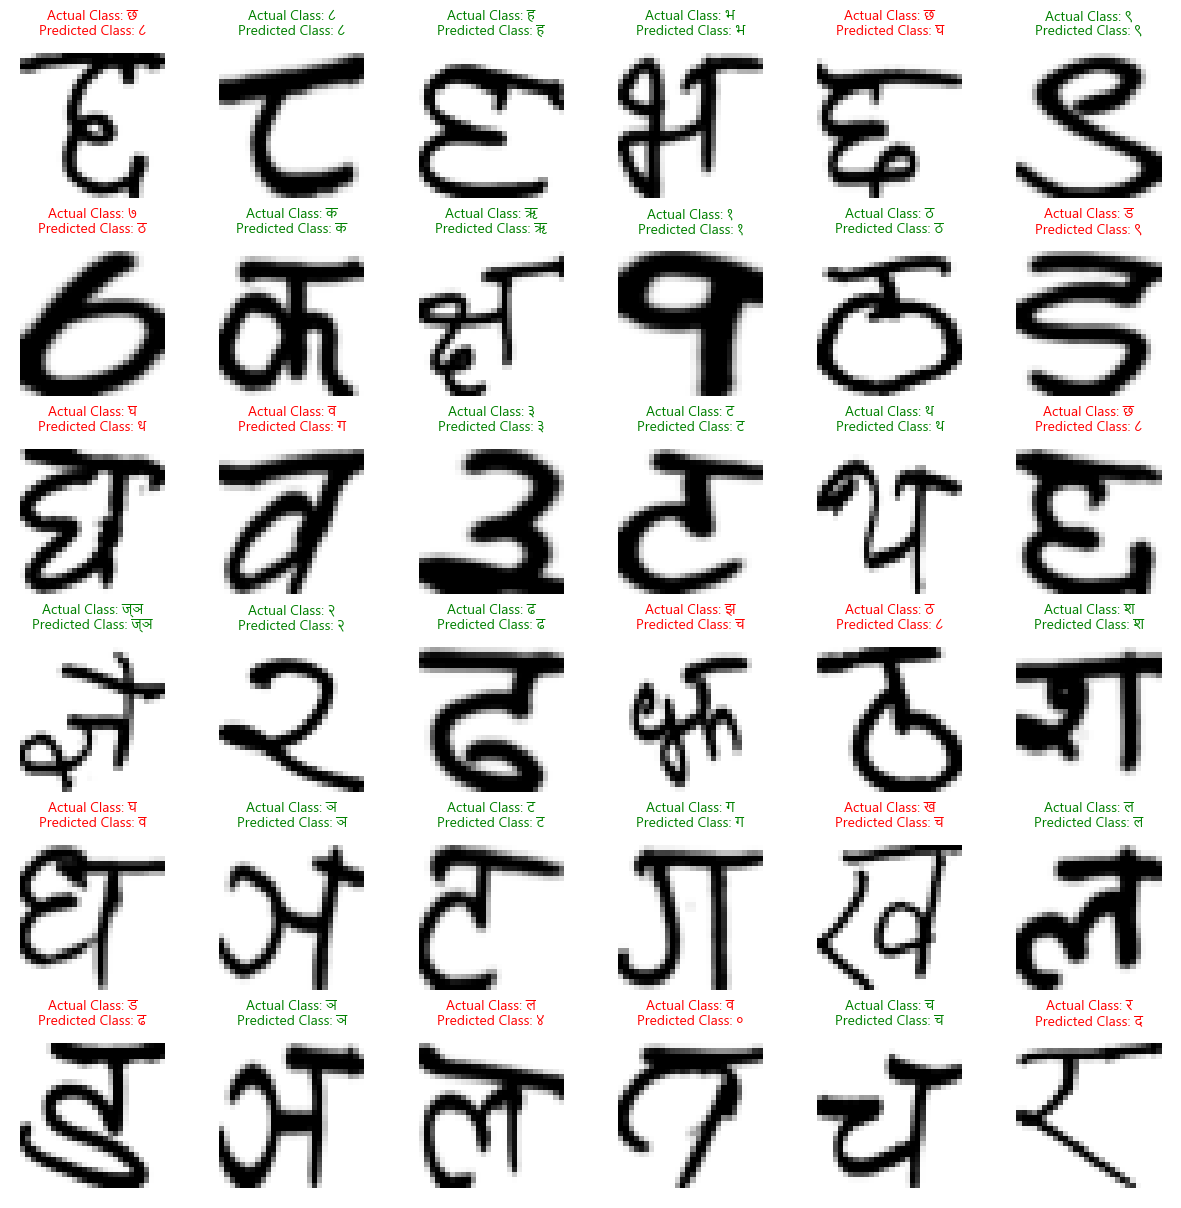

In [84]:
pred_and_plot(best_rf_classifier)

# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [86]:
# Initialize DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

In [87]:
# Fit the DecisionTreeClassifier on the reduced dimensionality data
dt_classifier.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [88]:
# Predictions on the test set using DecisionTreeClassifier
y_pred_dt = dt_classifier.predict(X_test_pca)

In [89]:
# Calculate accuracy for DecisionTreeClassifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [90]:
# Print accuracy of DecisionTreeClassifier
print("Accuracy of Decision Tree Classifier:", accuracy_dt)

Accuracy of Decision Tree Classifier: 0.3065942028985507


In [91]:
def objective(trial):
    # Define search space for hyperparameters
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # Initialize DecisionTreeClassifier with hyperparameters
    dt_classifier = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        splitter=splitter,
        criterion=criterion,
        random_state=42  # Ensure reproducibility
    )
    
    # Use cross-validation for training and evaluation
    cv_score = cross_val_score(dt_classifier, X_train_pca, y_train, cv=5, scoring='accuracy').mean()

    return cv_score



In [92]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')

[I 2024-02-24 11:29:13,337] A new study created in memory with name: no-name-54583869-7819-4916-945e-01dbf59fbf77


In [93]:
# Optimize hyperparameters
study.optimize(objective, n_trials=50, n_jobs=-1)

[I 2024-02-24 11:29:13,956] Trial 1 finished with value: 0.05319693094629156 and parameters: {'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 8, 'splitter': 'random', 'criterion': 'gini'}. Best is trial 1 with value: 0.05319693094629156.
[I 2024-02-24 11:29:13,980] Trial 4 finished with value: 0.057033248081841424 and parameters: {'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 5, 'splitter': 'random', 'criterion': 'entropy'}. Best is trial 4 with value: 0.057033248081841424.
[I 2024-02-24 11:29:14,139] Trial 3 finished with value: 0.08286445012787724 and parameters: {'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 4, 'splitter': 'random', 'criterion': 'entropy'}. Best is trial 3 with value: 0.08286445012787724.
[I 2024-02-24 11:29:14,335] Trial 6 finished with value: 0.11841432225063939 and parameters: {'max_depth': 5, 'min_samples_split': 16, 'min_samples_leaf': 6, 'splitter': 'random', 'criterion': 'gini'}. Best is trial 6 with value: 0.118414322

In [94]:
# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 7, 'splitter': 'best', 'criterion': 'gini'}


In [95]:
# Initialize DecisionTreeClassifier with best hyperparameters
best_dt_classifier = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    splitter=best_params['splitter'],
    criterion=best_params['criterion']
)

# Fit the best classifier on the training data
best_dt_classifier.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=21, min_samples_leaf=7, min_samples_split=9)

In [96]:
# Evaluate the performance on the test set
y_pred_dt = best_dt_classifier.predict(X_test_pca)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Final Decision Tree Accuracy: {accuracy_dt:.2%}")

Final Decision Tree Accuracy: 32.80%


# Save the Model

In [97]:
import joblib

In [98]:
save_model(best_dt_classifier, 'best_dt_classifier_model.joblib')

Model saved successfully to ./MyModels/best_dt_classifier_model.joblib


# Test

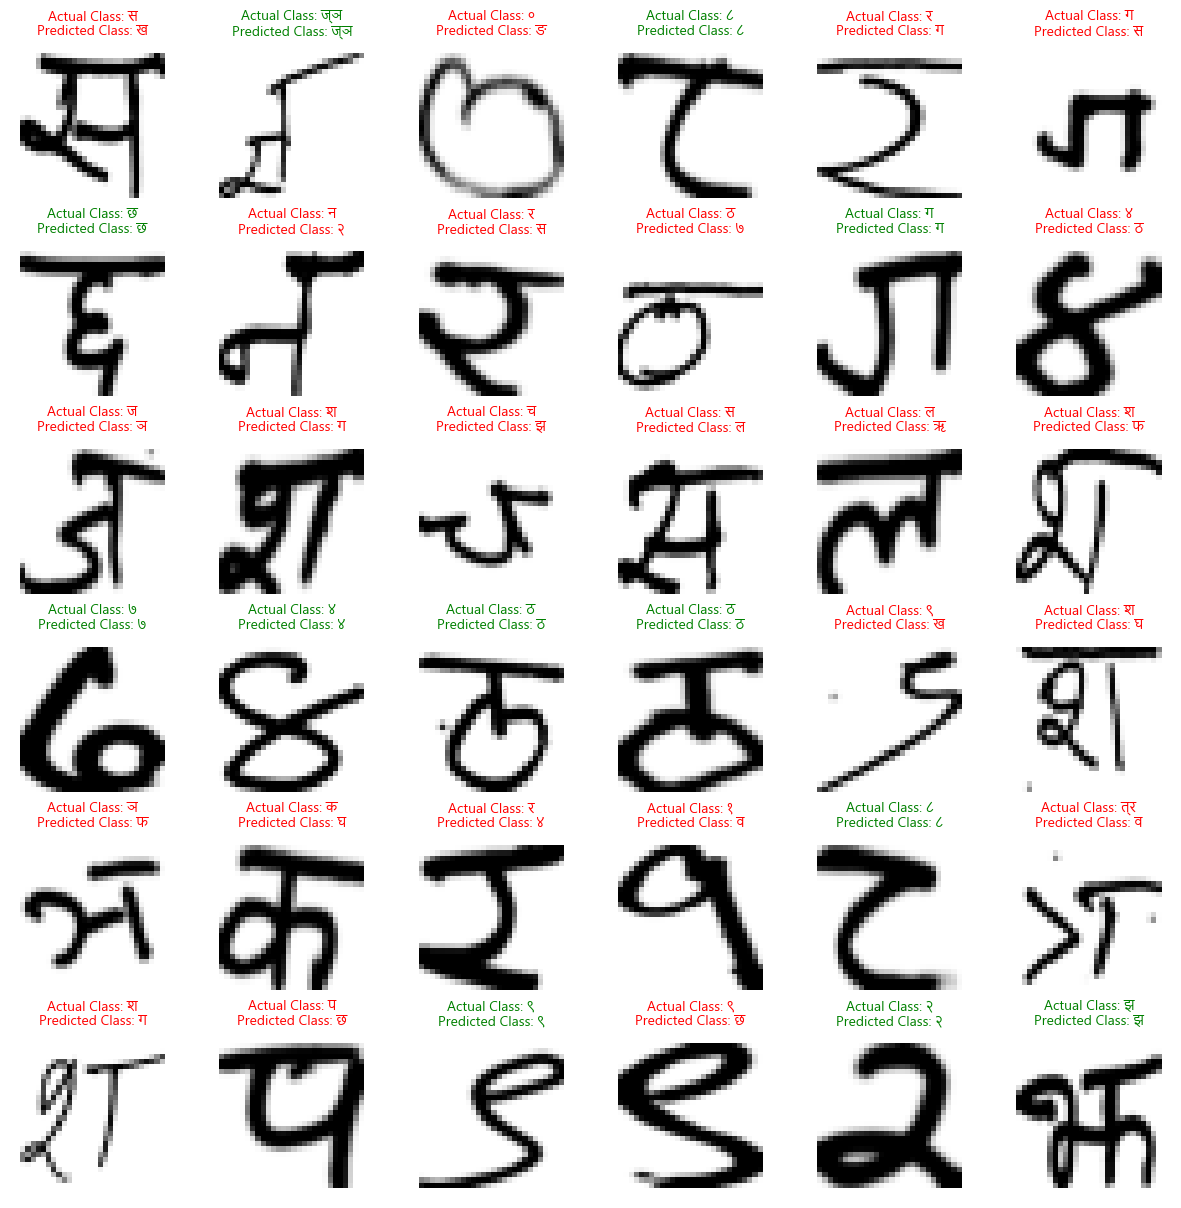

In [99]:
pred_and_plot(best_dt_classifier)